In [1]:
'''Check that the simulated kappa_gmf values are properly simulated, and also check them as a function of Z'''
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import matplotlib.lines as mlines
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from fancy.interfaces.uhecr import Uhecr
from fancy.interfaces.stan import uv_to_coord
from fancy.plotting import AllSkyMapCartopy as AllSkyMap

ptypes_list = ["p", "He", "N", "Si", "Fe"]
# ptypes_list = ["p", "He", "N"]
seed = 19990308

uhecr_file = "../../data/UHECRdata.h5"
uhecr = Uhecr()

# read kappa_gmf values for each particle type

kappa_gmf_list = []
coord_gal_list = []
coord_rand_list = []

coord_true_list = []
kappa_gmf_rand_list = []

gmf_model = "JF12"
detector = "TA2015"

with h5py.File(uhecr_file, "r") as f:
    print(f.keys())

    detector_dict = f[detector]

    kappa_gmf_dict = detector_dict["kappa_gmf"]

    gmf_model_dict = kappa_gmf_dict[gmf_model]

    for ptype in ptypes_list:
        gmf_model_dict_ptype = gmf_model_dict[ptype]
        coord_true_list.append(gmf_model_dict_ptype["omega_true"][()])
        coord_rand_list.append(gmf_model_dict_ptype["omega_rand"][()])
        coord_gal_list.append(gmf_model_dict_ptype["omega_gal"][()])
        kappa_gmf_list.append(gmf_model_dict_ptype["kappa_gmf"][()])
        kappa_gmf_rand_list.append(gmf_model_dict_ptype["kappa_gmf_rand"][()])

    glon = detector_dict['glon'][()]
    glat = detector_dict['glat'][()]
    uhecr_coord = uhecr.get_coordinates(glon, glat)
# for ptype in ptypes_list:
#     sim_output_file = "../../output/{0}_sim_{1}_{2}_{3}_{4}.h5".format(
#         "joint_gmf", "SBG_23", "TA2015", seed, ptype)

#     with h5py.File(sim_output_file, "r") as f:
#         uhecr_coord_list.append(uv_to_coord(f["uhecr/unit_vector"][()]))

#         kappa_gmf_list.append(f["uhecr/kappa_gmf"][()])
#         coord_gmf_list.append(f["plotvars/omega_rand_kappa_gmf"][()])
#         coord_defl_list.append(f["plotvars/omega_defl_kappa_gmf"][()])
#         # print(f["uhecr"].keys(), type(uhecr_coord))

#         # kappa_gmf

len(kappa_gmf_list[0])

<KeysViewHDF5 ['TA2015', 'auger2010', 'auger2014']>


72

In [2]:
kappa_gmf_list[4]

array([1.00000000e-10, 1.00000000e-10, 8.90758685e+00, 1.31629475e+01,
       2.39024987e+02, 4.50970266e+00, 8.16680493e+01, 6.50483679e+00,
       4.85347611e+00, 1.60318254e+00, 3.66456960e-01, 4.66276735e-01,
       1.00000000e-10, 7.62206693e+01, 4.95239108e+00, 1.70123877e+00,
       3.02450648e-01, 5.33025082e-01, 1.04680151e+01, 7.39110101e+00,
       2.46584225e+02, 1.07159995e+01, 2.75175895e+00, 9.39612282e-01,
       1.00000000e-10, 1.00000000e-10, 1.00000000e-10, 2.48228716e+00,
       1.00000000e-10, 1.67075104e+00, 1.73283144e+01, 6.86627059e-01,
       1.18518442e-01, 1.00000000e-10, 3.22358348e+00, 2.13758783e-01,
       1.29394086e+00, 4.15536022e+01, 3.15767578e+00, 8.26352873e+01,
       7.61667869e+00, 1.56896343e+00, 3.09662616e+00, 1.22373405e+00,
       2.04833066e+00, 2.47830950e+01, 2.05654073e-01, 2.57223670e+00,
       7.94060276e-01, 1.36372825e+00, 1.00000000e-10, 2.15900158e+00,
       3.73643813e+00, 4.39515636e+00, 7.25224662e-01, 1.00000000e-10,
      

In [3]:
ptype = 'N'
with_green_selection = True

ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]

sel_uhecr_idx = 24
sel_uhecr_lon, sel_uhecr_lat = 180 - np.rad2deg(
    coord_true_list[ptype_idx][sel_uhecr_idx, 0]
), np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 1])



<Figure size 1050x750 with 0 Axes>

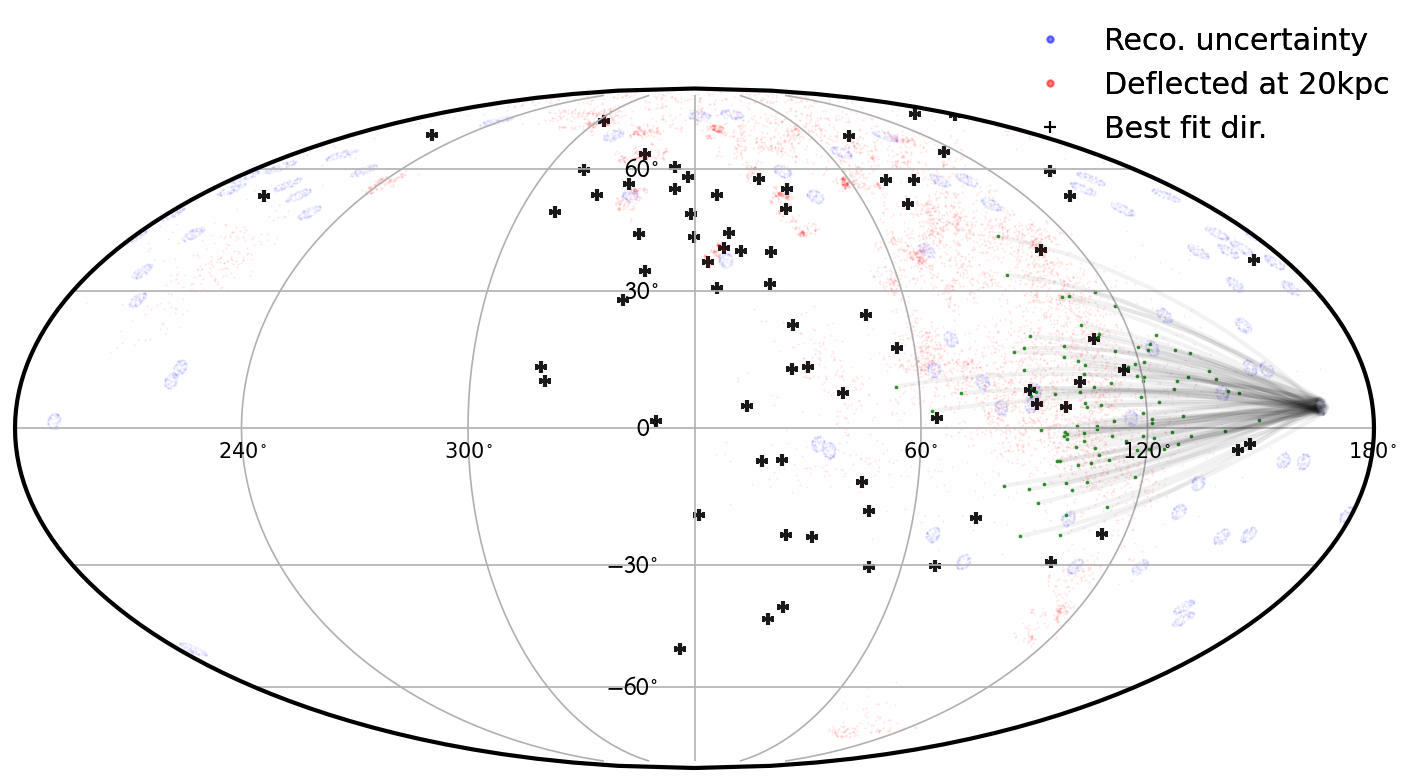

In [4]:
plt.style.use("minimalist")

skymap = AllSkyMap(lon_0=180)
skymap.fig.set_size_inches(12, 6)
skymap.set_gridlines(label_fmt="default", zorder=1)

skymap.scatter(
    np.rad2deg(coord_rand_list[ptype_idx][:, :, 0]),
    np.rad2deg(coord_rand_list[ptype_idx][:, :, 1]),
    color="b",
    alpha=0.05,
    s=1.0,
    lw=0,
)
skymap.scatter(
    np.rad2deg(coord_gal_list[ptype_idx][:, :, 0]),
    np.rad2deg(coord_gal_list[ptype_idx][:, :, 1]),
    color="r",
    alpha=0.1,
    s=1.0,
    lw=0,
)

if with_green_selection:
    skymap.scatter(
        np.rad2deg(coord_gal_list[ptype_idx][sel_uhecr_idx, :, 0]),
        np.rad2deg(coord_gal_list[ptype_idx][sel_uhecr_idx, :, 1]),
        color="g",
        alpha=0.8,
        s=3.0,
        lw=0,
    )

    for i in range(100):
        skymap.geodesic(
            np.rad2deg(coord_rand_list[ptype_idx][sel_uhecr_idx, i, 0]),
            np.rad2deg(coord_rand_list[ptype_idx][sel_uhecr_idx, i, 1]),
            np.rad2deg(coord_gal_list[ptype_idx][sel_uhecr_idx, i, 0]),
            np.rad2deg(coord_gal_list[ptype_idx][sel_uhecr_idx, i, 1]),
            alpha=0.05,
            color="k",
        )

skymap.scatter(
    180 - np.rad2deg(coord_true_list[ptype_idx][:, 0]),
    np.rad2deg(coord_true_list[ptype_idx][:, 1]),
    color="k",
    alpha=0.9,
    marker="+",
    s=30.0,
    zorder=0,
)


handles = [
    mlines.Line2D(
        [],
        [],
        color="b",
        marker="o",
        lw=0,
        markersize=3,
        alpha=0.3,
        label="Reco. uncertainty",
    ),
    mlines.Line2D(
        [],
        [],
        color="r",
        marker="o",
        lw=0,
        markersize=3,
        alpha=0.3,
        label="Deflected at 20kpc",
    ),
    mlines.Line2D(
        [],
        [],
        color="k",
        marker="+",
        lw=0,
        markersize=6,
        alpha=1,
        label="Best fit dir.",
    ),
]

legend1 = skymap.ax.legend(
    handles=handles, bbox_to_anchor=(0.72, 0.88)
)
skymap.ax.add_artist(legend1)
# skymap.fig.savefig("skymap_banana.png")


In [5]:
from scipy.optimize import root

"""Integral of Fischer distribution used to evaluate kappa_d"""

# evaluate dot product between deflected and randomized vector
# then obtain the effective thetea_rms for each (true) UHECR

def fischer_int(kappa, cos_thetaP):
    """Integral of vMF function over all angles"""
    return (1.0 - np.exp(-kappa * (1 - cos_thetaP))) / (1.0 - np.exp(-2.0 * kappa))


def fischer_int_eq_P(cos_thetaP, kappa, P):
    """Equation to find roots for"""
    return fischer_int(kappa, cos_thetaP) - P


ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
# print(kappa_gmf_list[ptype_idx])

cos_theta_arr = np.zeros(len(kappa_gmf_list[ptype_idx]))
for i, kappa_gmf in enumerate(kappa_gmf_list[ptype_idx]):
    sol = root(fischer_int_eq_P, x0=1, args=(kappa_gmf, 0.683))
    cos_theta = sol.x[0]
    cos_theta_arr[i] = cos_theta

thetas = np.rad2deg(np.arccos(cos_theta_arr))


<Figure size 1050x750 with 0 Axes>

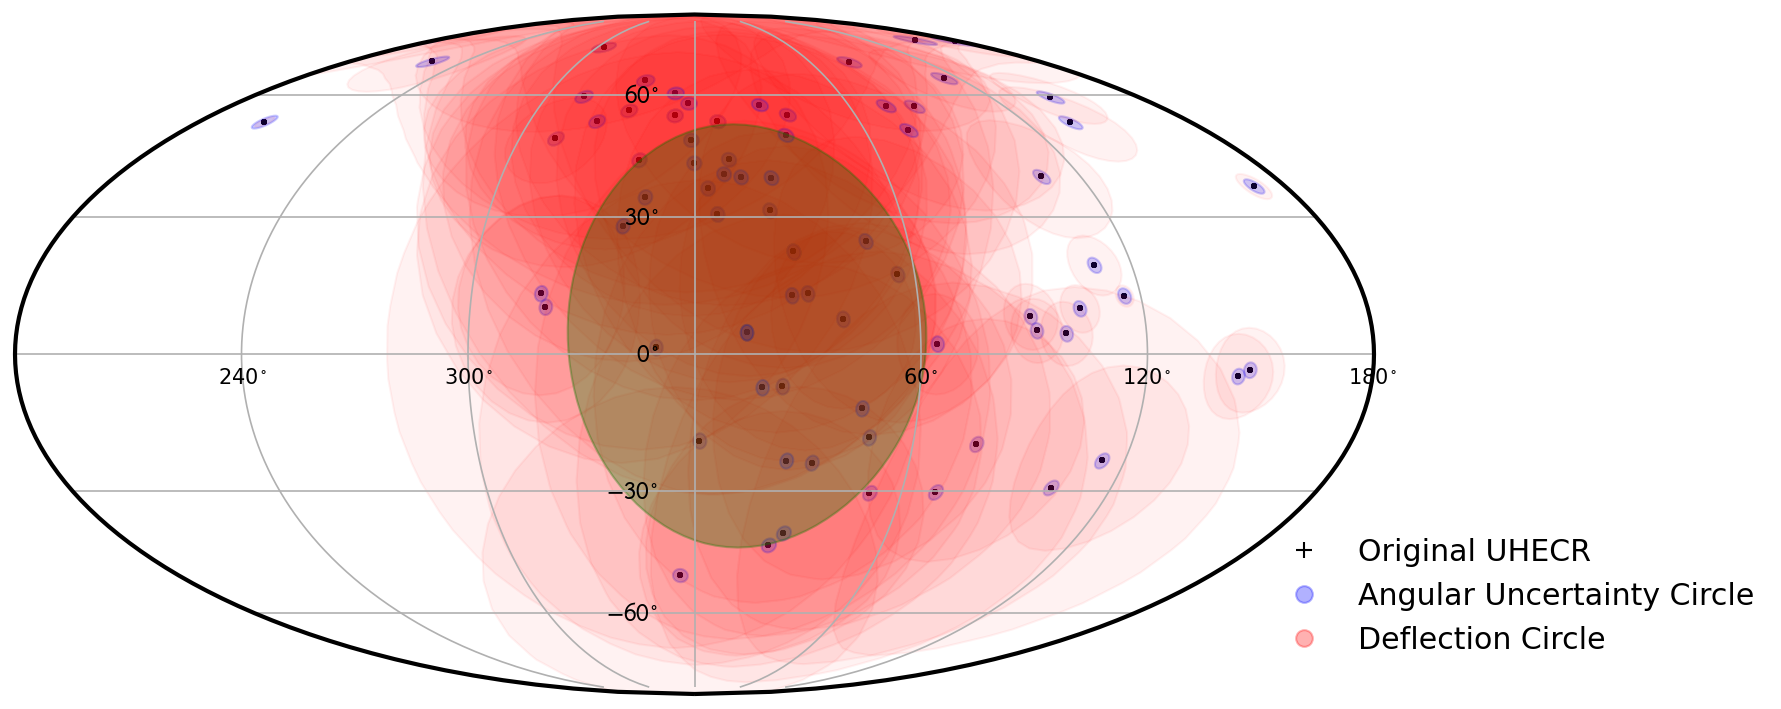

In [6]:
# evaluate dot product between deflected and randomized vector
# then obtain the effective thetea_rms for each (true) UHECR

skymap = AllSkyMap(lon_0=180)
skymap.fig.set_size_inches(12, 6)
skymap.set_gridlines(label_fmt="default")

ang_err = 1.7

for i, (lon, lat) in enumerate(coord_true_list[ptype_idx][:]):
    skymap.tissot(
        180 - np.rad2deg(lon), np.rad2deg(lat), ang_err, npts=30, color="b", alpha=0.2
    )
    skymap.tissot(
        180 - np.rad2deg(lon),
        np.rad2deg(lat),
        thetas[i],
        npts=30,
        color="r",
        alpha=0.05,
    )

skymap.scatter(
    180 - np.rad2deg(coord_true_list[ptype_idx][:, 0]),
    np.rad2deg(coord_true_list[ptype_idx][:, 1]),
    color="k",
    alpha=1,
    marker="+",
    s=10.0,
)

if with_green_selection:
    sel_uhecr_idx = 24
    skymap.tissot(
        180 - np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 0]),
        np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 1]),
        ang_err,
        color="b",
        alpha=0.2,
    )
    skymap.tissot(
        180 - np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 0]),
        np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 1]),
        thetas[sel_uhecr_idx],
        color="g",
        alpha=0.3,
    )

handles = [
    mlines.Line2D(
        [],
        [],
        color="k",
        marker="+",
        lw=0,
        markersize=8,
        alpha=1,
        label="Original UHECR",
    ),
    mlines.Line2D(
        [],
        [],
        color="b",
        marker="o",
        lw=0,
        markersize=8,
        alpha=0.3,
        label="Angular Uncertainty Circle",
    ),
    mlines.Line2D(
        [],
        [],
        color="r",
        marker="o",
        lw=0,
        markersize=8,
        alpha=0.3,
        label="Deflection Circle",
    ),
]

skymap.ax.legend(handles=handles, bbox_to_anchor=(1.3, 0.27))
# skymap.ax.title("Deflection skymap with data - {0}".format(ptype))

# skymap.scatter(np.rad2deg(coord_true_list[ptype_idx][:, 0]), np.rad2deg(coord_true_list[ptype_idx][:, 1]), color="k", alpha=1, marker="+", s=20.0)
# skymap.scatter(np.rad2deg(coord_rand_list[ptype_idx][:, :, 0]), np.rad2deg(coord_rand_list[ptype_idx][:, :, 1]), color="b", alpha=0.05, s=4.0)


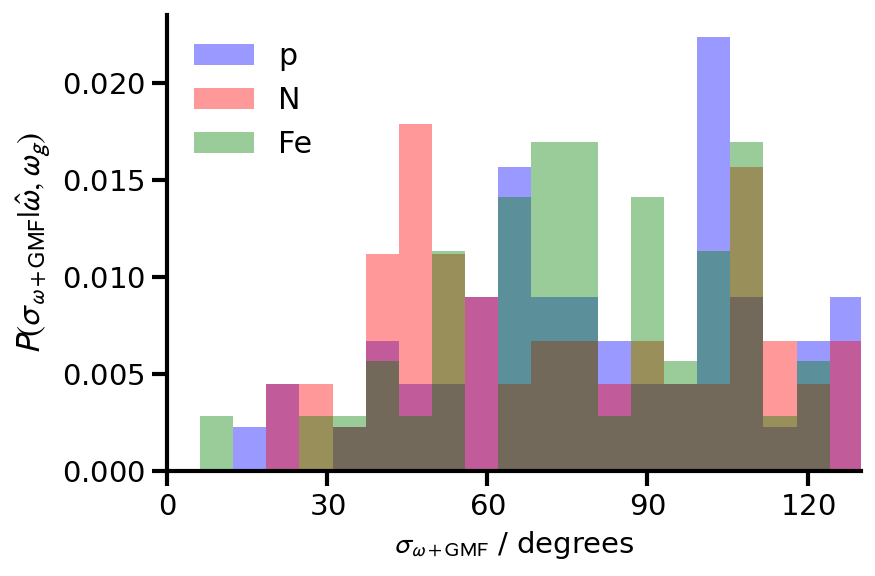

In [7]:
colors = ["b", "r", "g"]

fig, ax = plt.subplots(figsize=(6, 4))
# plt.hist(kappa_gmf_list[ptype_idx], bins=np.logspace(-2, 3, 10))
for i, ptype in enumerate(["p", "N", "Fe"]):

    ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
    # print(kappa_gmf_list[ptype_idx])

    not_zero_idces = np.argwhere(kappa_gmf_list[ptype_idx] > 1e-9)

    cos_theta_arr = np.zeros_like(kappa_gmf_list[ptype_idx])
    for j, kappa_gmf in enumerate(kappa_gmf_list[ptype_idx]):
        if kappa_gmf < 1e-9:
            kappa_gmf = 0
        sol = root(fischer_int_eq_P, x0=1-2*np.random.random(), args=(kappa_gmf, 0.683))
        cos_theta = sol.x[0]
        cos_theta_arr[j] = cos_theta

    thetas = np.rad2deg(np.arccos(cos_theta_arr))

    thetas = thetas[not_zero_idces]

    # print(thetas)

    ax.hist(
        thetas,
        bins=np.linspace(0, 180, 30),
        alpha=0.4,
        color=colors[i],
        # histtype='step',
        density=True,
        label=ptype,
        weights=np.ones_like(thetas) / len(thetas),
    )
#     plt.xscale("log")
ax.set_xlim([0, 130])
ax.set_xticks(np.arange(0, 130, 30, dtype=int))
# ax.set_yticks([0, 0.01, 0.02, 0.03])
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12)

# ax.set_yticklabels()
ax.legend()

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_xlabel(r"$\sigma_{{\omega + \rm{GMF}}}$ / degrees", fontsize=14)
ax.set_ylabel(
    r"$P (\sigma_{{\omega + \rm{GMF}}} | \hat{\omega}, \omega_{g})$", fontsize=16
)

fig.tight_layout()

fig.savefig("kappa_defl_histogram.png", dpi=400)

#     plt.hist(kappa_gmf_rand_list[ptype_idx][sel_uhecr_idx, :],
#             bins=np.logspace(-2, 2, 30),
#             alpha=0.4, color=colors[i], label=ptype)
#     plt.xscale("log")

#     plt.legend()


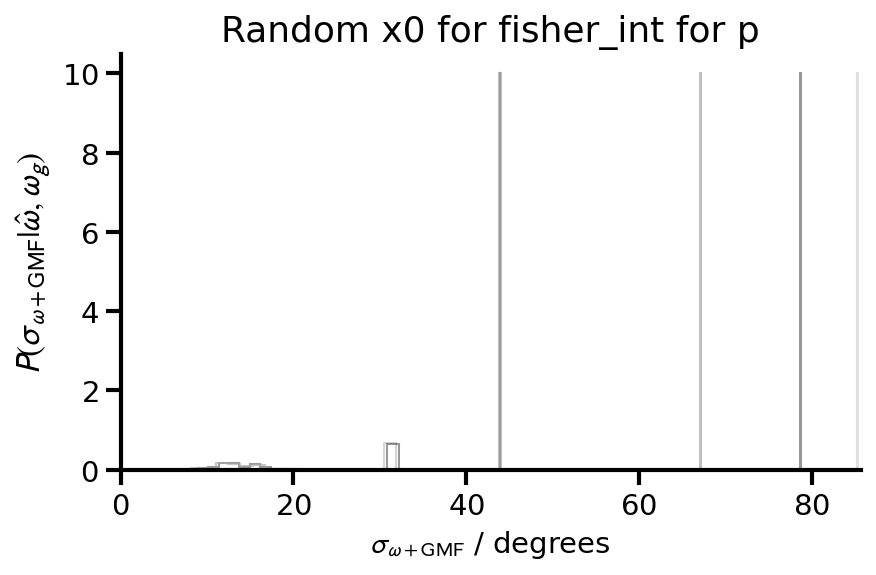

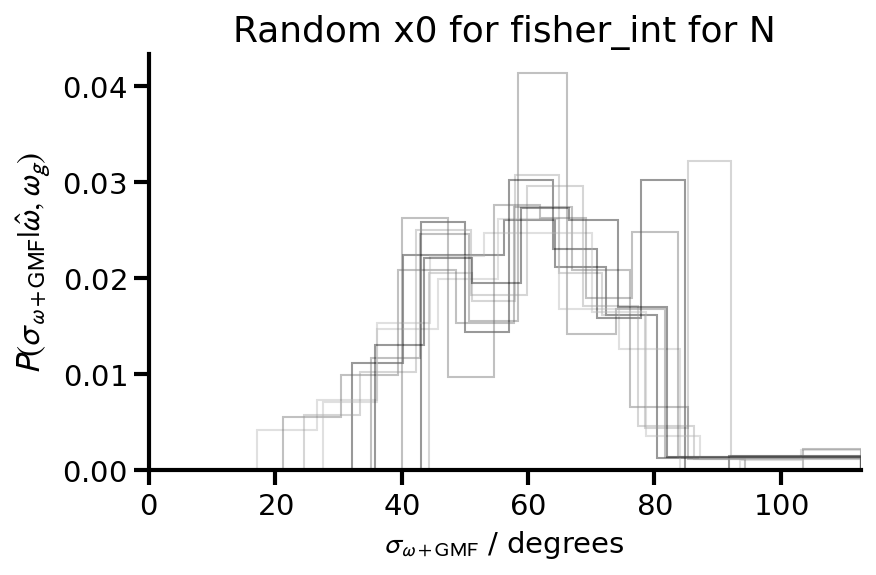

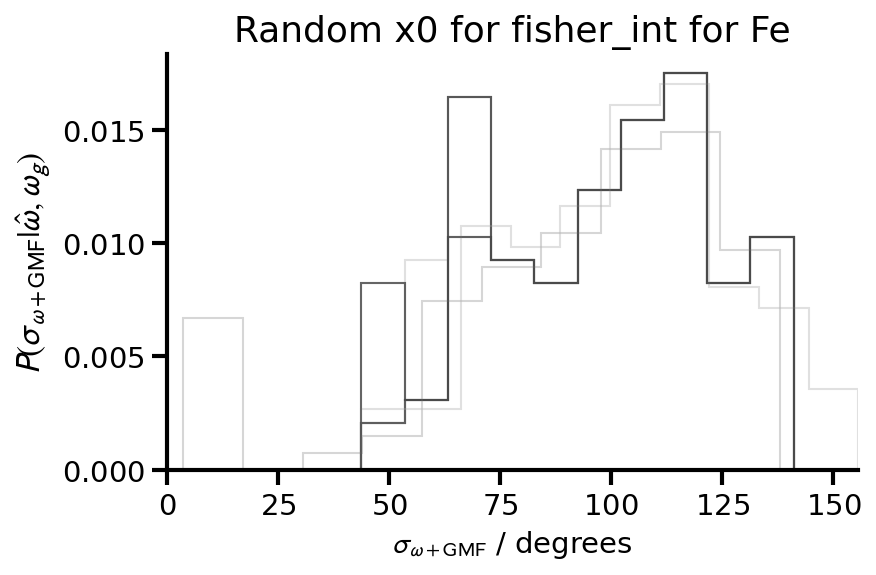

In [8]:
colors = ["k"]

# plt.hist(kappa_gmf_list[ptype_idx], bins=np.logspace(-2, 3, 10))
for i, ptype in enumerate(["p", "N", "Fe"]):
    fig, ax = plt.subplots(figsize=(6, 4))  

    ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
    # print(kappa_gmf_list[ptype_idx])

    for x0r in np.random.random(10):
        cos_theta_arr = np.zeros_like(kappa_gmf_rand_list[ptype_idx][sel_uhecr_idx, :])
        for j, kappa_gmf in enumerate(kappa_gmf_rand_list[ptype_idx][sel_uhecr_idx, :]):
            sol = root(fischer_int_eq_P, x0=x0r, args=(kappa_gmf, 0.683))
            cos_theta = sol.x[0]
            cos_theta_arr[j] = cos_theta
            # print(ptype, kappa_gmf, cos_theta)

        thetas = np.rad2deg(np.arccos(cos_theta_arr))
        # print(ptype, min(thetas), max(thetas))

        ax.hist(
            thetas,
            # bins=np.linspace(0, 30, 20),
            histtype='step',
            alpha=0.4,
            # color="k",
            label=ptype,
            density=True,
            weights=np.ones_like(thetas) / len(thetas),
        )
#     plt.xscale("log")
    ax.set_xlim(0,)
    # ax.set_xticks(np.arange(0, 35, 5, dtype=int))
    # ax.set_yticks([0, 0.005, 0.01, 0.015])
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.label.set_fontsize(12)

    # ax.set_yticklabels()
    # ax.legend()
    ax.set_title('Random x0 for fisher_int for ' + ptype)
    ax.set_xlabel(r"$\sigma_{{\omega + \rm{GMF}}}$ / degrees", fontsize=14)
    ax.set_ylabel(
        r"$P (\sigma_{{\omega + \rm{GMF}}} | \hat{\omega}, \omega_{g})$", fontsize=16
    )

    fig.tight_layout()

# fig.savefig(f"kappa_defl_{ptype}_histogram.png", dpi=400)
